# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys
p = os.path.abspath('..')
if p not in sys.path:
    sys.path.insert(0,p)
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)
    
    
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
p = os.path.abspath('../../../custom_envs/gym-tiger')
if p not in sys.path:
    sys.path.insert(0, p)
    

"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name

def reload():
    reload_module_by_name('rlpomdp.models.tiger_env', 'QLearnerSeq')
    global QLearnerSeq
    from rlpomdp.models.tiger_env import QLearnerSeq

# Setup ENV and Model

In [52]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from rlpomdp.utils import play_one, plot_running_avg
from rlpomdp.models.tiger_env import QLearnerSeq

env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1)
model = QLearnerSeq(env, alpha=.01, gamma=.9, seq_len=2)
eps = 1
n = 0
ot = env.reset()

if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)

# Take one action and update Q

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [33]:
print(str(model))
otm1 = ot
atm1 = model.sample_action(otm1, eps)
ot, r, done, info = env.step(atm1)
at = model.best_action(ot)
model.update(otm1, atm1, r, ot, at)
_otm1 = env.translate_obs(otm1)
_atm1 = env.translate_action(atm1)
print(_otm1, ',', _atm1, ',', r)
print(str(model))



                                                  OPEN LEFT | OPEN RIGHT | LISTEN
		------------------------------- | --------- | ---------- | ------
[]                                                      0.0 |        0.0 |    1.0
['END']                                                 0.0 |        0.0 |    1.0
['END', 'END']                                          0.0 |        0.0 |    1.0
['END', 'START']                                        0.0 |        0.0 |    1.0
['END', 'GROWL_RIGHT']                                  0.0 |        0.0 |    1.0
['END', 'GROWL_LEFT']                                   0.0 |        0.0 |    1.0
['START']                                               0.0 |        0.0 |    1.0
['START', 'END']                                        0.0 |        0.0 |    1.0
['START', 'START']                                      0.0 |        0.0 |    1.0
['START', 'GROWL_RIGHT']                                0.0 |        0.0 |    1.0
['START', 'GROWL_LEFT']     

# Play 1 Episode

In [11]:
print(str(model))
play_one(env, model, eps, verbose=True)
print(str(model))



                                                  OPEN LEFT | OPEN RIGHT | LISTEN
		------------------------------ | --------- | ----------  | ------
[]                                                      0.0 |        0.0 |    0.0
['END']                                                 0.0 |        0.0 |    0.0
['END', 'END']                                          0.0 |        0.0 |    0.0
['END', 'START']                                        0.0 |        0.0 |    0.0
['END', 'GROWL_RIGHT']                                  0.0 |        0.0 |    0.0
['END', 'GROWL_LEFT']                                   0.0 |        0.0 |    0.0
['START']                                               0.0 |        0.0 |    0.0
['START', 'END']                                        0.0 |        0.0 |    0.0
['START', 'START']                                      0.0 |        0.0 |    0.0
['START', 'GROWL_RIGHT']                                0.0 |        0.0 |    0.0
['START', 'GROWL_LEFT']     

# Play 5K Episodes

In [53]:
(.85*10 + .15*-100)

-6.5



                                                  OPEN LEFT | OPEN RIGHT | LISTEN
		------------------------------------------- | --------- | ----------  | ------
['START']                                               0.1 |        0.0 |    0.0




                                                  OPEN LEFT | OPEN RIGHT | LISTEN
		------------------------------------------- | --------- | ----------  | ------
['START']                                               0.1 |        0.0 |    0.0
['START', 'START']                                     -1.9 |       -1.9 |   -0.6
['START', 'GROWL_RIGHT']                               -4.9 |       -5.5 |   -3.0
['START', 'GROWL_LEFT']                                -8.5 |       -1.4 |   -2.2
['GROWL_RIGHT', 'START']                               -6.4 |       -6.2 |   -3.9
['GROWL_RIGHT', 'GROWL_RIGHT']                          3.6 |      -11.9 |   -2.2
['GROWL_RIGHT', 'GROWL_LEFT']                          -3.2 |       -3.8 |   -2.2
['GROWL_LEFT

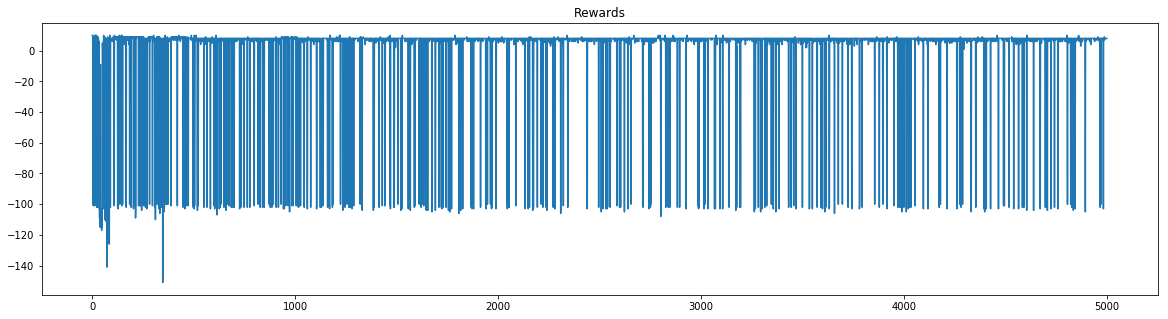

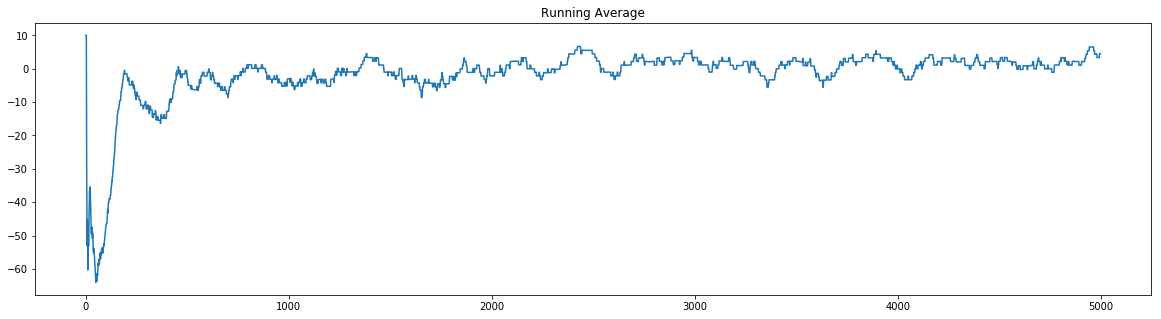

In [54]:
N = 5000
totalrewards = np.empty(N)
for n in range(N):
    eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print(str(model))

print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards)